# David Reynoso
Penguins Predictions and analysis...

In [1]:
import pandas as pd

# get our data
df = pd.read_csv('data.csv')
df #call to see what it is

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


# Split Data into train and test sets

In [2]:
#removing all rowns that have NaN values in the columns we want to keep
df=df.dropna(subset=["Species","Culmen Length (mm)","Culmen Depth (mm)","Sex","Flipper Length (mm)","Body Mass (g)","Island"])#dropping NaN values
val = ["MALE", "FEMALE"] #have a obj called val
df = df[df.Sex.isin(val) == True] #keep all Sex's that are male and female (because there is one '.' value in Sex)
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN


In [3]:
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [4]:
#creating a copy of df called asdf with the non numerical columns we care about encoded to binary data in order to have the predictor and target sets encoded while leaving df as is 
asdf=df.copy()
asdf['Species']=le.fit_transform(asdf["Species"])
asdf['Sex']=le.fit_transform(asdf['Sex'])
asdf['Island']=le.fit_transform(asdf['Island'])
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN


In [5]:
#splitting the data into target variables (y) which is just the species column and predictor variables (X), containing all other columns
X=asdf.drop(["Species"],axis=1)#predictor variables
y=asdf["Species"]#target variables
y.head()

0    0
1    0
2    0
4    0
5    0
Name: Species, dtype: int64

In [6]:
y.unique()#checking that y has 3 islands

array([0, 1, 2])

In [7]:
X.head()#checking predictor variables

,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Anvers,2,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,1,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Anvers,2,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454,NaN
2,PAL0708,3,Anvers,2,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302,NaN
4,PAL0708,5,Anvers,2,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,0,8.76651,-25.32426,NaN
5,PAL0708,6,Anvers,2,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,1,8.66496,-25.29805,NaN


In [8]:
from sklearn.model_selection import train_test_split
#splitting the target and predictor data into train and test (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [9]:
y_train

108    0
145    0
86     0
185    1
116    0
      ..
340    2
147    0
216    1
170    1
16     0
Name: Species, Length: 266, dtype: int64

#### Cleanup

In [10]:
#writing a function to drop irrelevant columns right off the bat for the following reasons
def drop_irrelevant_columns(df):
    df=df.drop(['studyName',#each penguin has an individual study name so it is not related to its species and was given to it by the conductors of this study
             'Sample Number',#same reason as above
             'Region',#they are all from the same region so there is no difference in region between species
             'Stage',#subject to change and is bias based on when the study was conducted so if I were to try to classify a penguin from the same region at a different time stage may lead to flase classifications
             'Individual ID',#irrelevant, they are different for everyone just like studyName and Sample Number
             'Clutch Completion',#confounding variables and would require knowledge of reproductive stage of penguins so too complicated when we want a single measurement
             'Date Egg',#too many possible confounding variables
             'Delta 15 N (o/oo)',#subject to change over time and dependant on stage of life 
             'Delta 13 C (o/oo)',#same reason
             'Comments'],
             axis=1)#not a quantitave or qualitative measure
    return df

In [11]:
X=drop_irrelevant_columns(X)#cleanup on overall set X in case we need it later
X.head()

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1


In [12]:
#initial cleanup of training set
X_train=drop_irrelevant_columns(X_train)
X_train.head()#checking

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
108,0,38.1,17.0,181.0,3175.0,0
145,1,39.0,18.7,185.0,3650.0,1
86,1,36.3,19.5,190.0,3800.0,1
185,1,51.0,18.8,203.0,4100.0,1
116,2,38.6,17.0,188.0,2900.0,0


In [13]:
#initial cleanup on test set
X_test=drop_irrelevant_columns(X_test)
X_test.head()

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
100,0,35.0,17.9,192.0,3725.0,0
320,0,48.5,15.0,219.0,4850.0,0
259,0,48.7,15.7,208.0,5350.0,1
308,0,47.5,14.0,212.0,4875.0,0
211,1,45.6,19.4,194.0,3525.0,0


In [14]:
#initial cleanup on the whole data frame in order to visualize the entire data set in our exploritory analysis
df=drop_irrelevant_columns(df)
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.3,20.6,190.0,3650.0,MALE


# Exploritory Analysis

#### Pair Plot

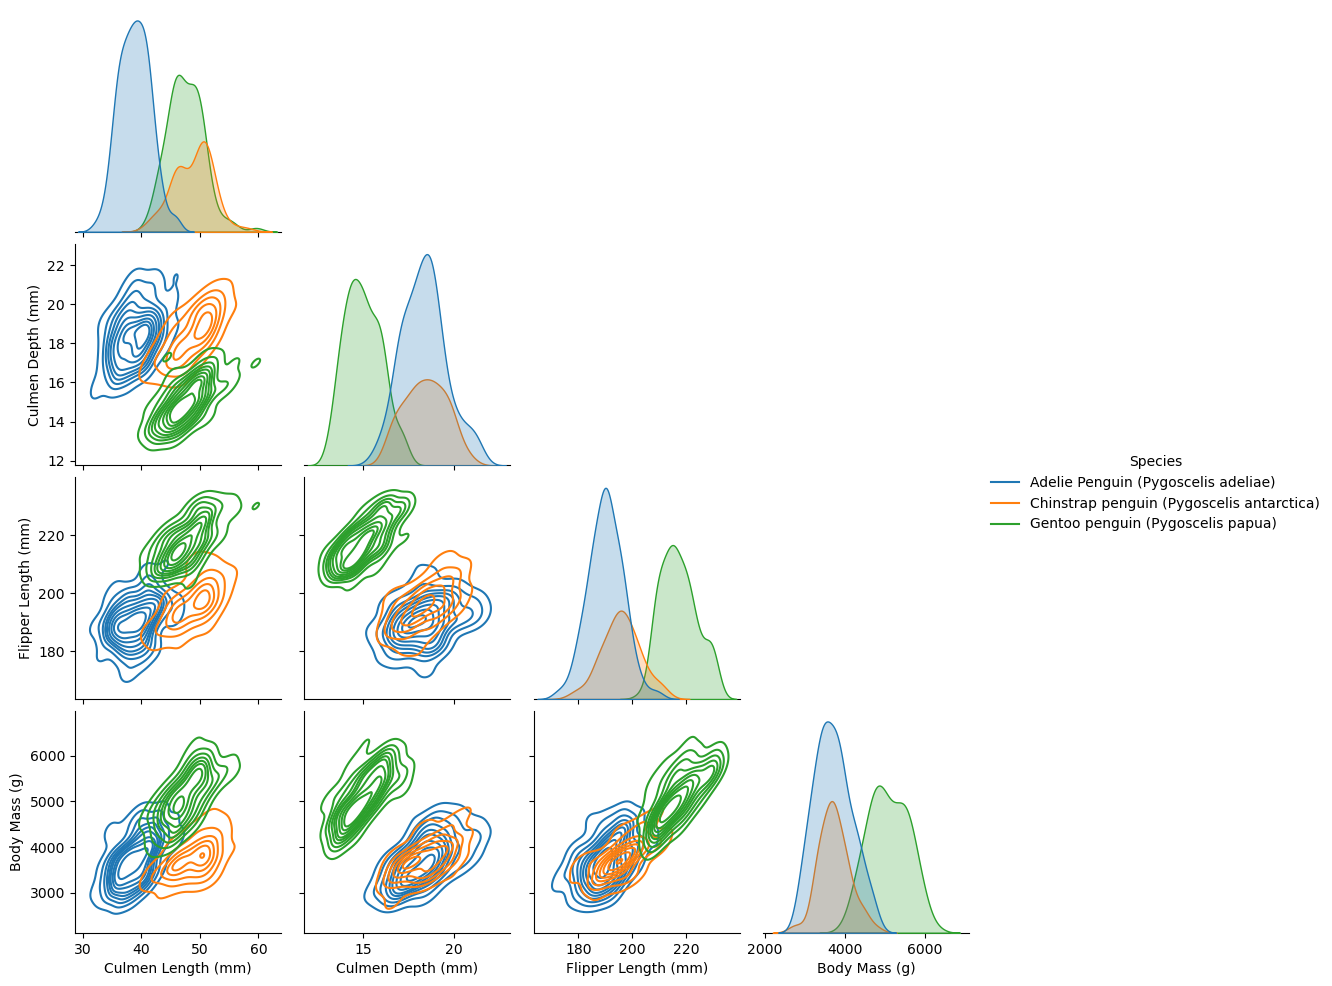

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
#create a pair plot so we can visualize the inital corrolations
fig2=sns.pairplot(df,hue="Species",corner=True,kind='kde')
plt.show()

### PairPlot Analysis: 

Here in the pairplots we can clearly see how the quantitative variables line up. We can see the layered kernal density estimate graphs on the diagonals show how a quantitative variable relates to itself. From here we can clearly see that Culmen Depth, Culmen Length, , Body Mass, or Flipper length alone cannot justify a classificaion of pengions into destinct species (due to the heavy overlaps seen, especially between Adelie and Chinstrap penguins for body mass and flipper length as well as between Chinstrap and Gentoo penguins for culmen length). The little overlap in flipper length between Gentoo and Adelie penguins is worth noting as it indicates that flipper length may be useful in distinguishing between these two species but, even if there was 0 overlap which is not the case, it would not be nearly enough to distinguish either of the species, especially Adelie penguins, from Chinstrap penguins so more analysis needs to be done. However, from the visualization we can see that Culmen Length vs Body mass, Culmen Length vs Flipper Length, or Culmen Length vs Culmen Depth seem resonable based off of KDE's alone (as there are unique regions where only one of the 3 pengions exist, wtih not too much overlap). Culmen Depth vs Body Mass and Culmen Depth vs Flipper Length could be very useful in distinguishing Gentoo penguins between the other 2 species because there is no apparent overlap but the significant amount of overlap between Chinstrap and Adelie penguins would prevent us from distinguishing them apart meaning that these 2 metrics could serve exclusively as a source of elimination of Gentoo penguins but, since we are seeking to minimize the amount of measurements needed to determine the species of a penguin, we can only use this as a method to broadly estimate the acuracy of our model in distinguishing between Gentoo penguins and the other 2 species rather than building the model off of it.

### Box Plot of Body Mass by Gender and Species

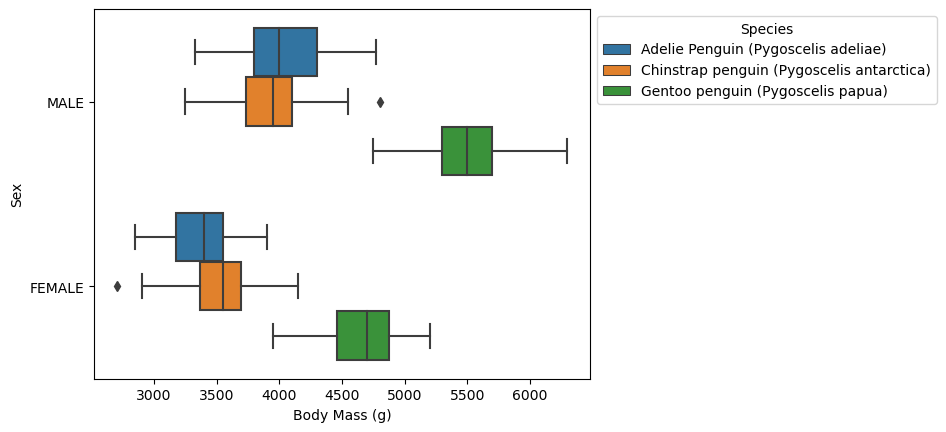

In [16]:
#plot body mass by sex according to species 
ax=sns.boxplot(data= df, x= "Body Mass (g)", y= "Sex",hue="Species" )
sns.move_legend(ax,'upper left',bbox_to_anchor=(1,1))# moving the legend outside the plot for clarity
plt.show()

#### Body Mass by gender Box Plot Analysis

The boxPlot above was made because we wished to understand how Gender affected body mass within the species of penguins and visualize how the body masses of penguins of the same sex of different species differ. Unlike Island, Sex is never subject to change so we thought that corrolating it with a quantitative variable may be useful given that there is no bias involved in determining sex itself, just as for the quantitative variables. We picked body mass but in either case the example above shows that Sex can in fact be used in our feature selection as there is variation between the BodyMass distributions according the sexes of the penguins. By eye, it appears Gentoo penguins have the greatest difference in body mass between males and females (males tend to have higher body masses than females) and Gentoo penguins of both sexes tend to have higher body masses than penguins of the other 2 species of the same sex. Adelie and Chinstrap penguins have more similar body masses by sex but male adelie penguins appear to tend to have higher mody masses than male Chinstrap penguins while female Adelie penguins tend to have lower body masses than female Chinstrap penguins.

#### Flipper Length, Culmen Length and Culmen Depth grouped by Sex and Species statistics

In [17]:
import numpy as np
asdf=df.groupby(["Sex","Species"])["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)"].aggregate([np.mean,np.median,np.min,np.max])
asdf

/var/folders/sl/fyghq6k55n30j6x1qc8gmlrw0000gn/T/ipykernel_74769/2026734480.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  asdf=df.groupby(["Sex","Species"])["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)"].aggregate([np.mean,np.median,np.min,np.max])


Culmen Length (mm)         \
                                                               mean median   
Sex    Species                                                               
FEMALE Adelie Penguin (Pygoscelis adeliae)                37.257534  37.00   
       Chinstrap penguin (Pygoscelis antarctica)          46.573529  46.30   
       Gentoo penguin (Pygoscelis papua)                  45.563793  45.50   
MALE   Adelie Penguin (Pygoscelis adeliae)                40.390411  40.60   
       Chinstrap penguin (Pygoscelis antarctica)          51.094118  50.95   
       Gentoo penguin (Pygoscelis papua)                  49.473770  49.50   

                                                              \
                                                  amin  amax   
Sex    Species                                                 
FEMALE Adelie Penguin (Pygoscelis adeliae)        32.1  42.2   
       Chinstrap penguin (Pygoscelis antarctica)  40.9  58.0   
       Gentoo penguin (Pygoscelis papua)          40.9  50.5   
MALE   Adelie Penguin (Pygoscelis adeliae)        34.6  46.0   
       Chinstrap penguin (Pygoscelis antarctica)  48.5  55.8   
       Gentoo penguin (Pygoscelis papua)          44.4  59.6   

                                                 Culmen Depth (mm)         \
                                                              mean median   
Sex    Species                                                              
FEMALE Adelie Penguin (Pygoscelis adeliae)               17.621918  17.60   
       Chinstrap penguin (Pygoscelis antarctica)         17.588235  17.65   
       Gentoo penguin (Pygoscelis papua)                 14.237931  14.25   
MALE   Adelie Penguin (Pygoscelis adeliae)               19.072603  18.90   
       Chinstrap penguin (Pygoscelis antarctica)         19.252941  19.30   
       Gentoo penguin (Pygoscelis papua)                 15.718033  15.70   

                                                              \
                                                  amin  amax   
Sex    Species                                                 
FEMALE Adelie Penguin (Pygoscelis adeliae)        15.5  20.7   
       Chinstrap penguin (Pygoscelis antarctica)  16.4  19.4   
       Gentoo penguin (Pygoscelis papua)          13.1  15.5   
MALE   Adelie Penguin (Pygoscelis adeliae)        17.0  21.5   
       Chinstrap penguin (Pygoscelis antarctica)  17.5  20.8   
       Gentoo penguin (Pygoscelis papua)          14.1  17.3   

                                                 Flipper Length (mm)         \
                                                                mean median   
Sex    Species                                                                
FEMALE Adelie Penguin (Pygoscelis adeliae)                187.794521  188.0   
       Chinstrap penguin (Pygoscelis antarctica)          191.735294  192.0   
       Gentoo penguin (Pygoscelis papua)                  212.706897  212.0   
MALE   Adelie Penguin (Pygoscelis adeliae)                192.410959  193.0   
       Chinstrap penguin (Pygoscelis antarctica)          199.911765  200.5   
       Gentoo penguin (Pygoscelis papua)                  221.540984  221.0   

                                                                
                                                   amin   amax  
Sex    Species                                                  
FEMALE Adelie Penguin (Pygoscelis adeliae)        172.0  202.0  
       Chinstrap penguin (Pygoscelis antarctica)  178.0  202.0  
       Gentoo penguin (Pygoscelis papua)          203.0  222.0  
MALE   Adelie Penguin (Pygoscelis adeliae)        178.0  210.0  
       Chinstrap penguin (Pygoscelis antarctica)  187.0  212.0  
       Gentoo penguin (Pygoscelis papua)          208.0  231.0

Since we already visualized body mass by species and sex with a box plot above, we decided to make a table with the mean, maximum and minimum of the Culmen Lengths, Culmen Depths and Flipper Lengths by species and sex in order to see how much they differ by species while accounting for possible differences in sex as a confounding variable (e.g. there is an uneven proportion of male vs female species in the data for one of the species and not the others or there is more of a difference between these measurments by sex in one species by not the other). Our observations are the following:

For Culmen Length: The means and medians are very similar within the species for each species, Chinstrap and Gentoo penguins of the same sex have similar means and medians but there is much more varience among male Gentoo penguins then male Chinstrap penguins as well as much more varience among felmale Chinstrap penguins then female Gentoo penguins. So on average, Chinstrap and Gentoo penguins of the same sex have very similar Culmen Lengths and, for females, the Culmen Length does not go below 40.9 mm for both, howover, Chinstrap females may have a Culmen Length up to 7.5mm higher than the maximum for female Gentoo penguins. Male Gentoo penguins may have Culmen Lengths up to 4.1mm shorter and 3.8mm longer than their Chinstrap counterparts. As for Adelie penguins, their mean and median Culmen Lengths are significantly lower than that of the other 2 species of the same sex, especially for males, and female Adelie penguins can have a culmen length up to 8.8 mm shorter than that of the other two species and female Gentoo and Chinstrap penguins have maximum Culmen lengths that are 8.3mm and 15.8mm longer than the maximum for female Adelie penguins, respectively. Male Adelie penguins have a minimum culmen length of around 10-11mm shorter than that of their Chinstrap and Gentoo counterparts, which have maximums of 9.8mm and 13.6mm longer, respectively. We can conclude that culmen length may be helpful in distinguishing Adelie penguins from the other 2 species but not distinguishing the other two species from each other.

For Culmen Depth: The mean and median culmen depths for Gentoo penguins are around 3-5mm shorter than that of the other species of the same sex, while Adelie and Chinstrap penguins have very similar mean and median culmen lengths. The mimimum Culmen Depth for Gentoo penguins is either negligably below, slightly above, or the same as the maximum of the other 2 species of the same sex. We can conclude that Culmen Depth may be useful in distinguising Gentoo penguins from the other two species but not the other two species from each other.

For Flipper Length: The means and medians between the species differ, with Chinstrap penguins having slightly longer (4-8mm depending on sex) average and median flipper lengths than Adelie penguins of the same sex and Gentoo penguins having significantly longer flipper lengths than Chinstrap (and Adelie) penguins of the same sex. There is no overlap between the range of flipoper lengths of female Gentoo penguins and that of the other teo species, however, there is more overlap between male Gentoo penguins flipper lengths range and that of males of the other two species than there is for culmen length. Therefore, like Culmen Depth, Flipper length may indicate whether a penguin is Gentoo but is unlikely to classify between the other 2 species if it is not.

For all 3 measurements in all species, the statistics differed (some more than others) by sex, which further indicates that sex is an important qualitative variable to take into account.

#### Island to Penguin Species

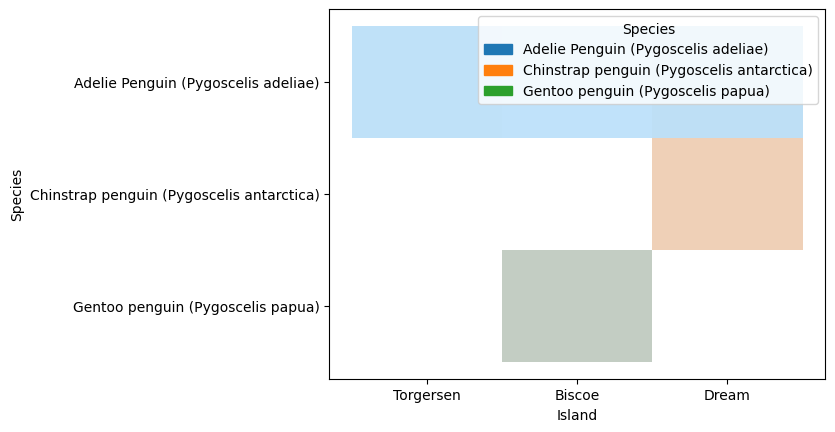

In [18]:
#plotting a histogram of islands to penguin species
sns.histplot(df, x="Island", y="Species", hue="Species", alpha=0.3)
plt.show()

### Histogram Analysis:

As we can see the quantitative variables above, we chose to look into qualitative variables. Here we are trying to see the distribution of 3 penguin species based off their islands. Looking at the results we all agreed that Island is a terrible classifier as Gentoo Penguins only exist on Biscoe Island, whereas, Torgersen Island only has Adelie Penguins but Adelie penguins also exist in all 3 islands. Island would therefore only help distinguish Adelie penguins who live on Torgersen island from the other two species and Chinstrap from Gentoo penguins but would not distinguish Adelie penguins living on the other two islands from the other two species. That, combined with the facts that we found that some quantitative measurements such as Flipper Length and Body Mass would help distinguish Gentoo penguins from Chinstrap penguins instead, our groupby table and body mass box plot showed that Sex is a significant confounding variable in interpreting the quantitative measures, and that we would like these indicators to be able to classify the species of a penguin found anywhere, even in Siberia, and even species currently living on those islands may migrate over time due to a variety of factors, such as climate change, gave us enough reason to eliminate Island, leaving Sex as our qualitative variable.

In [19]:
#remove Island, as stated above
def remove_island(df):
    df=df.drop(["Island"],axis=1)
    return df
X_train=remove_island(X_train)#remove island from training set
X_test=remove_island(X_test)#remove island from test set
df=remove_island(df)#remove island from df
X=remove_island(X)
X_train.head()#checking that it worked 

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
108,38.1,17.0,181.0,3175.0,0
145,39.0,18.7,185.0,3650.0,1
86,36.3,19.5,190.0,3800.0,1
185,51.0,18.8,203.0,4100.0,1
116,38.6,17.0,188.0,2900.0,0


# Feature Selection

For both our qualitative and two quantatative features, we used logisticRegression to find our best columns. Below also will show the thought process of implementing different variations to pick our best columns. We perform a lot of cross validations on our "LR" model, with all combinations to then compare the scores with each combinations of columns. Since our data was so large that the exhuastive search had to have the iterations increased, (not feasible without it) we also compare our exhaustive search findings to that of the greedy stagewise approach. We see if the output of the greedy approach creates a nice union of best columns with the exhaustive approach and look to that union to decide our best features. I implemented a limiter on the max number of columns to the Greedy approach to make it easier to decide the best 3 features. 

In [20]:
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import numpy as np
#iterates through all subsets and identifies the best subset column based on cross validation error
def exhaustive_search(model, X, y, min_cols, max_cols):
    """
    Using exhaustive search approach to search for best feature subset.

    Parameters:
    model : scikit-learn model
    X : pandas DataFrame of feature matrix.
    y : pandas col of target variable.
    min_cols : int minimum cols
    max_cols : int max cols
    
    Returns:
    best_cv : float, highest mean cross-validation score
    best_cols : column names of the best feature subset found.
    """
    best_cv = 0
    best_cols = ["Sex"]# we know we need at least 1 qualitative variable and chose Sex as it accounts for the most confounding variables in the quantiative measurements so we are fixing Sex as one of the 3 columns
    for n_cols in range(min_cols, max_cols + 1):#iterating through the columns in X
        for cols in combinations(X.columns, n_cols):#iterating through all combinations of predictor variables
            if 'Sex' in cols:#Sex needs to be in the combinations because we know for sure it will be one of the 3 variables we will use
                cv = cross_val_score(model, X[list(cols)], y, cv = 10,error_score='raise').mean()#calculating cross validation score between the predictor variables (X) and the target variables (Y)
                if cv > best_cv:#finding the best subset column in terms of cross validation error
                    best_cv = cv
                    best_cols = cols    
    return best_cv, best_cols#returning the best cross validation score and best predictor variable in terms of the cross validation score

In [21]:
from sklearn.linear_model import LogisticRegression
# to handle our data, we need to increase the max iterations as otherwise for this set of data
# the basic 100 iterations does not converge to optimal weights , ending prematurely
# giving a poor performance
LR = LogisticRegression(max_iter=5000)#creating our linear regression model

best_cv, best_cols = exhaustive_search(LR, X_train, y_train, 2, 3)#3 columns because we want 3 variables

In [22]:
best_cv, best_cols#output is (0.9886039886039886, ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'))

(0.9923076923076923, ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'))

#### Exhaustive Search Analysis
from our exhaustive search by cross validation error, we found an accuracy score of approximately 98% with best columns being Sex, Culmen Length and Culmen Depth. Because the accuracy score is so high and there are so many parameters adding noise to the model, we are concerned about overfitting so we will proceade with a greedy stage wise feature selection to further assess. We fixed Sex as needing to be in the best columns so of course they include sex, culmen length being in the best columns is consistant with our exploratory analysis table showing that Culmen Length was useful in distinguishing Adelie penguins from the other 2 species. As for Culmen Depth, our exploratory analyiss groupby table does indicate that it may be helpful in distinguishing Gentoo penguins from the other 2 species, however, we also found that body mass and flipper length would be a similarly useful, if not a better, indicator so we will pursue further feature selection strategies.

In [23]:
# As we can see we needed a lot of iterations, let us see how the greedy stagewise selection handles it 
def initialize_lists():
    """
    Create an "active" list with a single random column
    from X.columns and an "inactive" list with 
    all remaining columns. 
    """
    # grab a single random column
    active = [np.random.choice(X.columns)]
    
    # make a list of all the other columns
    inactive = list(X.columns)
    inactive.remove(active[0])
    return active, inactive

# Write a function to change the status of a column.
def move(col, active, inactive, mode = "activate"):
    """
    Activate or deactivate a single column
    by moving it between the active and inactive
    lists. 
    Does not modify active or inactive -- instead 
    returns copies. 
    """
    # create copies
    new_active = active.copy()
    new_inactive = inactive.copy()
    
    if mode == "activate":
        # if we are activating a column
        new_inactive.remove(col)
        # add col to the active list
        new_active.append(col)
    
    # if we are deactivating a column    
    if mode == "deactivate":
        new_active.remove(col)
        new_inactive.append(col)
    
    # return copies
    return new_active, new_inactive

In [24]:
active, inactive = initialize_lists()
active, inactive

(['Body Mass (g)'],
 ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex'])

In [25]:
def greedy_stagewise_feature_selection(model, X, y, n_iters = 20, maxcol = len(list(X.columns)) ):
    
    """
    Use greedy stagewise feature selection approach to search for best feature subset

    Parameters:
    model : scikit-learn model were using
    X : pandas DataFrame of the feature matrix.
    y : pandas col of the target variable.
    n_iters : int the maximum number of iterations to perform.
    maxcol : int maximum number of columns in output

    Returns:
    best_CV : float the highest mean cross-validation score
    active : The names of the selected features.
    """
    # initialize with a single, randomly selected column
    active, inactive = initialize_lists()
    # initialize the best CV score
    best_CV = 0
    active,inactive=move("Sex", active, inactive, mode = "activate")
    # main loop, n_iters times
    for i in range(n_iters):
        if (len(active) > maxcol):
            break
        # alternate between activating and deactivating
        for mode in ["activate", "deactivate"]:
        
            # if mode is "activate" and there are any remaining inactive
            # columns, randomly select one. Otherwise, continue
            if (mode == "activate"):
                if len(inactive) > 0:
                    col = np.random.choice(inactive)
                    if col=='Sex':
                        while col=='Sex':#fixing sex as active since we already decided it would be a quantitative variable
                            col=np.random.choice(inactive)

                else: 
                    continue
            
            # if mode is "deactivate" and if there at least 2 active
            # columns then pick a random active column
            if (mode == "deactivate") and (len(active) >= 2):
                col = np.random.choice(active)
            
            # create a new, proposed active list by moving
            # col between lists
            
            new_active, new_inactive = move(col, active, inactive, mode)
            # compute the CV score
            CV_score = cross_val_score(LR, X[new_active], y, cv = 10).mean()
            
            # if the CV score is an improvement, update the 
            # active and inactive column sets. 
            
            if (CV_score > best_CV) and (len(new_active) >=1) and (len(new_active) <= maxcol):
                best_CV = CV_score
                active = new_active
                inactive = new_inactive
            
            print("Number of columns: " + str(len(active)) + ". CV score: " + str(best_CV))
    return best_CV, active

In [26]:
best_CV, best_cols = greedy_stagewise_feature_selection(LR, X_train, y_train, n_iters = 10)

Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 4. CV score: 0.9886039886039886
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9923076923076923
Number of columns: 3. CV score: 0.9

In [27]:
best_CV, best_cols# output is (0.9923076923076923, ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'])

(0.9923076923076923, ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'])

Now we see a nice development as we only have one qualitative here to choose from, and we have a shorter list of quantatative. The only qualitative column is Sex, so we can select that as our qualatative (it is consistantly this way as we continue as its the only in the union) and we have plenty of qualitives so let us lower our max columns.

In [28]:
best_cv, best_cols = exhaustive_search(LR, X_train, y_train, 2, 2)

In [29]:
best_cv, best_cols# output is (0.8042735042735043, ('Flipper Length (mm)', 'Sex')) so there is an 80% accuracy by cross validation error when looking at sex and flipper length alone

(0.8042735042735043, ('Flipper Length (mm)', 'Sex'))

In [39]:
best_CV, best_cols = greedy_stagewise_feature_selection(LR, X_train, y_train, n_iters = 10, maxcol = 3)

Number of columns: 3. CV score: 0.7327635327635328
Number of columns: 2. CV score: 0.7554131054131055
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.965954415954416
Number of columns: 3. CV score: 0.96595441595441

In [40]:
best_CV, best_cols# output is (0.9774928774928775, ['Sex', 'Body Mass (g)', 'Culmen Length (mm)'])

(0.965954415954416, ['Sex', 'Body Mass (g)', 'Culmen Length (mm)'])

In [32]:
# we can now pick again from the union and we have our feature selection

#### Feature Selection Explanation
Our 3 choices for qualitative variables were clutch complesion, Island and Sex. 
We eliminated Clutch completion from the very beginning because there are too many confounding variables, such as reproductive patterns possibly being affected by season for example. We then eliminated Island in our exploratory analysis as explained above. We also found that Sex significantly influenced the quantitative variables leaving Sex as our qualitative variable- that is why we fixed it as in the active column in our greedy stage wise feature selection function. Our model has had limited success as we found different results for accuracy in the best column as well as the columns included in best columns when running the code multiple times. We chose to go with the one that had a higher accuracy score than most, was yielded the most times and was consistant with our findings in our exploratory analysis, which was the columns Sex, Body Mass and Culmen length with an accuracy score of approximately 97%. As explained above, Sex was definitely going to be our qualitative variable and, from our groupby table and pair plot, we found that Culmen Length appeared to be the best measurement for distinuishing Adelie penguins from the other 2 species as is it is the only variable without significant overlap. Moreover, we found that Body Mass and Flipper Length were 2 variables that could help best distinguish Gentoo penguins but when the function yielded flipper length with Culmen length and sex, the accuracy score was lower than that for body mass, culmen length and sex. We therefore chose Sex, Culmen Length and Body Mass as our variables and will proceed to evaluate their ability to predict the species of a penguin with Machine-Learning models.

### Our chosen features are Culmen Length (mm)', 'Sex', 'Body Mass (g)

# Machine-Learning Models:

In [41]:
# Setup X_train and X_test to have the columns that feature selection states are the best.
X_train = X_train[['Culmen Length (mm)', 'Body Mass (g)', 'Sex']]
X_test = X_test[['Culmen Length (mm)', 'Body Mass (g)',  'Sex']]
X_test

,Culmen Length (mm),Body Mass (g),Sex
100,35.0,3725.0,0
320,48.5,4850.0,0
259,48.7,5350.0,1
308,47.5,4875.0,0
211,45.6,3525.0,0
...,...,...,...
159,51.3,3750.0,1
335,55.1,5850.0,1
87,36.9,3500.0,0
88,38.3,3950.0,1


In [42]:
import seaborn as sns
from matplotlib import patches as mpatches
import numpy as np
# use this to create the plots w/ decision regions
def regions(m, X, y):

    '''
    Function that fits model to X and y
    
    Parameters:
    m: the model to be passed
    X: the master X table to be passed
    y: the test values to be bassed
    
    Returns:
    nothing but prints the decision matrix 
    '''
    # create figures for the total ammount of Sexes
    sexes = X['Sex'].unique()
    fig, ax = plt.subplots(1, len(sexes), figsize=(12, 7))
    colors = {0:'Adelie',1:'Chinstrap',2:'Gentoo'}
    color_map = y.map(colors)
    body_range = np.linspace(X['Body Mass (g)'].min(), X['Body Mass (g)'].max())
    culmen_range = np.linspace(X['Culmen Length (mm)'].min(), X['Culmen Length (mm)'].max())

    # Create a meshgrid using the culmen and body ranges
    g1, g2 = np.meshgrid(culmen_range, body_range)
    for i, sex in enumerate(sexes):
        X_sex = X[X['Sex'] == sex]
        Z = m.predict(np.c_[g1.ravel(), g2.ravel(), np.ones(g1.ravel().shape) * 1.0 * sex])
        Z = Z.reshape(g1.shape)
        ax[i].set_xlabel('Culmen Length (mm)')
        
        # properly title the graphs
        RealSex="string"
        if sex == 1:
            RealSex="Male"
        else: 
            RealSex="Female"
        ax[i].set_title("Sex = " + RealSex)
        colours={'Adelie':'blue','Chinstrap':'green','Gentoo':'red'}


        # scatter plot
        sns.scatterplot(x='Culmen Length (mm)', y='Body Mass (g)', hue=color_map,palette=colours,
                        data=X_sex, ax=ax[i], alpha=0.5)

        # decision regions
        ax[i].contourf(g1,g2, Z, alpha=0.2, cmap='jet')


    # Set only one y-axis label for all plots
    ax[0].set_ylabel('Body Mass (g)')
    mpatches.Patch(color='red',alpha=0.2)

    # Create the legend
    legend0 = mpatches.Patch(color='blue', label='Adelie', alpha=0.2)
    legend1 = mpatches.Patch(color='green', label='Chinstrap', alpha=0.2)
    legend2 = mpatches.Patch(color='red', label='Gentoo', alpha=0.2)
    fig.legend(handles=[legend0, legend1, legend2], loc='upper right',
               fontsize='medium', framealpha=1)

    
    fig.suptitle('Decision Regions')

    fig.tight_layout()
    plt.show()

# Random Forests 

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
trees = [1,2,3,4,5,6,7,8,9,10]
scoreTrees=[]
for i in trees:
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    score = cross_val_score(rf, X, y, cv=5).mean()
    scoreTrees.append(score)
    print("Test accuracy: "+str(score)+" for a Neural Network of Depth- "+str(i))

Test accuracy: 0.9160560832202623 for a Neural Network of Depth- 1
Test accuracy: 0.9429669832654908 for a Neural Network of Depth- 2
Test accuracy: 0.9819990954319312 for a Neural Network of Depth- 3
Test accuracy: 0.9699683401175939 for a Neural Network of Depth- 4
Test accuracy: 0.9819990954319312 for a Neural Network of Depth- 5
Test accuracy: 0.9729534147444596 for a Neural Network of Depth- 6
Test accuracy: 0.9819990954319312 for a Neural Network of Depth- 7
Test accuracy: 0.9669832654907282 for a Neural Network of Depth- 8
Test accuracy: 0.9759384893713252 for a Neural Network of Depth- 9
Test accuracy: 0.9790592492085028 for a Neural Network of Depth- 10


In [45]:
# Combine the two lists into a list of tuples
d = list(zip(trees, scoreTrees))

# Create a pandas dataframe from the list of tuples
toPrint = pd.DataFrame(d, columns=['Layers', 'Score'])

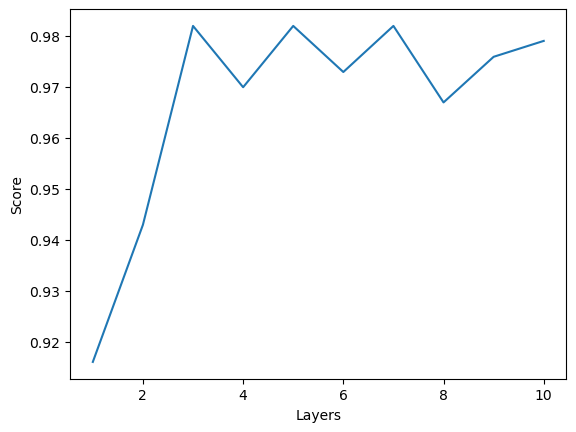

In [46]:
ax = sns.lineplot(x='Layers', y='Score',data=toPrint)

# Show the plot
plt.show()

#### Score vs Layers graph analysis
The graph above indicates how the accuracy score is related to the complexity of the forest classifier. We wanted to identify the level of complexity (layers) that yielded the highest accuracy score while minimizing risks around overfitting. The line graph shows that the score starts around 96% then drops to below 94% at 2 layers, then rapidly rises to above 97% around 3 layers before preceding to follow a volitile, mostly overall upwards sloping trend until the score drops back to where it was at 3 layers at 10 layers. We chose to incorporate 3 layers as it appears to be the minimal amount of complexity needed to achieve a relitevely high accuracy score.

In [47]:
rf = RandomForestClassifier(n_estimators=3)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
TreeScore = rf.score(X_test, y_test)
print("Test accuracy: "+str(TreeScore))

Test accuracy: 0.9701492537313433


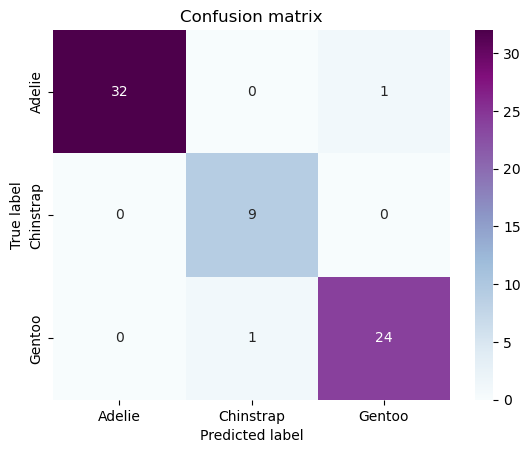

In [48]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
tf = confusion_matrix(y_test, y_pred)
axis_names=["Adelie","Chinstrap","Gentoo"]
sns.heatmap(tf, annot=True, cmap='BuPu',yticklabels=axis_names,xticklabels=axis_names)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Confusion Matrix Analysis
First see the confusion matrix of our model indicates that the model has 32 true positives (actual and predicted value the same) w/ one false negative (the actual value is positive, predicition negative). We also see zero false positives (the actual value is negative, prediction positive), and 34 true negatives (actual and predicted value the same). The confusion matrix above shows that the model correctly predicted the species of the test penguins based on the culmen length, body mass and sex of the predictor data in all cases except for 4 Adelie penguins that it predicted to be Chinstrap penguins and 1 Chinstrap penguin that it predicted to be an Adelie penguin. We ran it several times and another time, for example, it predicted a Chinstrap penguin to be a Gentoo penguin as well as an Adelie and Chinstrap penguin both of which were actually Gentoo penguins. These mistakes reflect the limitations of our model. We know from our explanatory analyisis that, when accounting for sex, there was some overlap between Gentoo penguins and the other 2 species (which of the 2 depended on gender) for body mass and a lot of overlap between Adelie and Chinstrap penguins according to the body mass by gender box plot. Moreover, we know from the table with the means, maximums, medians and minimums that there was some overlap in Culmen Lengths between Adelie penguins and the other 2 species as well as a lot of overlap between Gentoo and Chinstrap penguins. Put differently, our explanatory analysis gave reason to believe that, on average, a penguin with a Culmen Length below a certain amount is likely to be an Adelie penguin and a penguin with a body mass above a certain amount is likely to be a Gentoo penguin, and if neither are true then the penguin must be a Chinstrap penguin by force of elimination. However, a penguin which lies within the lower end of the range of body masses for Gentoo penguins or in the higher end of the range for culmen lengths for adelie penguins, for example, will be difficult to classify and the combination of these factors may make it even more difficult to classify. Our model goes further in assessing how differences between combinations of these factors can help distinguish a species but, the more layers go into our model, the more outliers and irrelevant information will distract it from making an accurate prediction. Our model is therefore correct most of the time but, due to the fact that we can only use 3 measurements, it can be bias based on the overall statistics of the species and therefore makes mistakes with penguins that fall within ends of the ranges for their species that overlap with other species. 

/Users/davidreynoso/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/davidreynoso/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


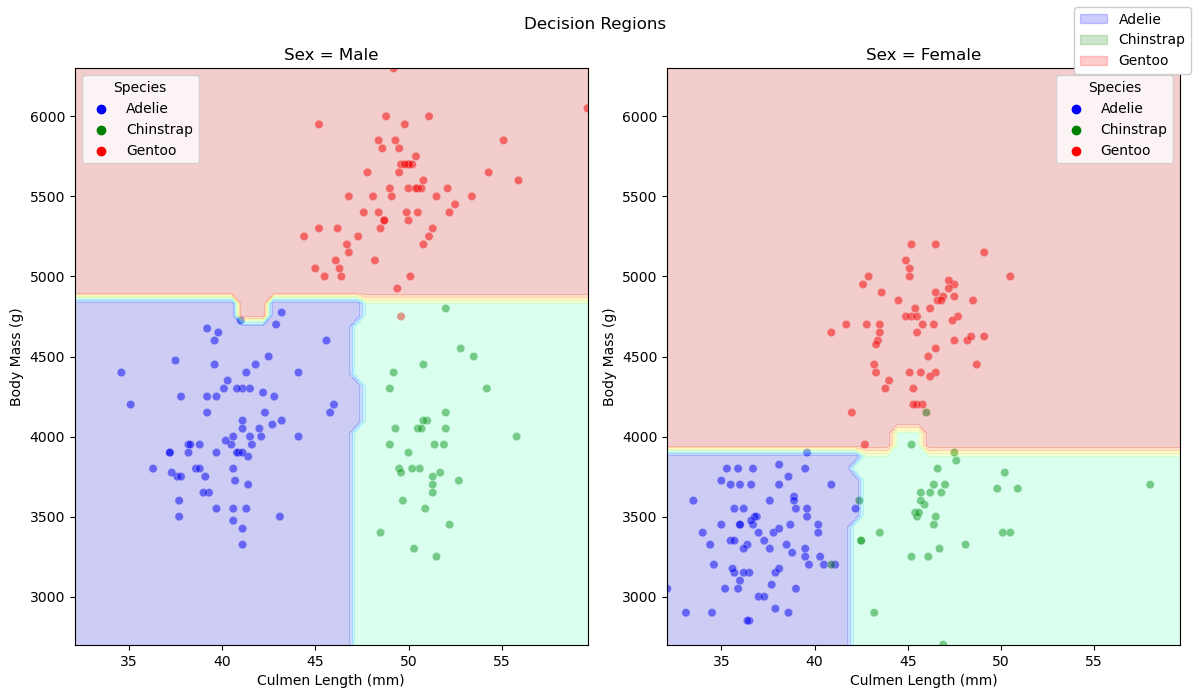

In [49]:
regions(rf, X, y)

#### Decisions Regions Analysis
We will start by noting that there are limitations to our model and, when running it multiple times, the results yielded differed, sometimes rather significantly. However, the overall trend is consistant as it predicted Adelie penguins to be in the left part of the plot and the right side to be divided between Gentoo penguins on the top and Chinstrap penguins on the bottom. In other words, it predicted Adelie penguins to have lower Culmen Lengths with varying Body Masses and Gentoo and Chinstrap penguins to have similar Culmen Lengths, both higher than that of Adelie penguins, but Gentoo penguins to have higher body masses. This is consitant with our exploratory analysis as well. In terms of accuracy, the accuracy scores usually varied from around 92%-96% which was reflected in the decisions regions, as the lower accuracy scores usually resulted in some decisions regions penetrating into others, as in the decision region represing Adelie penguins would have a narrow sliver crossing all the way through the Chinstrap penguin decision region for males, which is likely the result of some outliers or combinations of outlying or irrelevant factors creating bias influencing the overall trend of the data. However, the actual data points did almost always fall within the predicted decisions regions, so the limitations were more around overstating the decisions regions rather than understating them.

In [50]:
X

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,1
342,45.2,14.8,212.0,5200.0,0


# Mutlinomial LogisticRegression

In [51]:
from sklearn.linear_model import LogisticRegression
def C_param(X,y,test):
    """ Cross_val for a multi log reg model needed for the C parameter in the model to prevent overfitting from too 
    large of a C value
    Parameters:
    X: Training data.
    y: Target data.
    test: List containing values for complexity parameter to test on.
    
    returns: N/a
    """
    all_scores = []
    wanted_C = None
    cv_best = 0
    for c in test:
        #use current c in test
        mod = LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs',max_iter = 10000, C=c)
        mod.fit(X, y)
        cv_score = cross_val_score(mod, X, y, cv= 10).mean()
        all_scores.append(cv_score*100)
        print( "CV score with C= " + str(c) + "is " + str(cv_score))
        if cv_score > cv_best:
            wanted_C = c #new C value
            best_cv = cv_score
    fig, ax = plt.subplots(figsize = (8,8))
    ax.plot(test, all_scores)
    ax.set_xscale("log")
    ax.set_xlabel('C')
    ax.set_ylabel('Accuracy')
    plt.grid()
    plt.show()

CV score with C= 0.0001is 0.7512820512820513
CV score with C= 0.001is 0.9094017094017094
CV score with C= 0.01is 0.951139601139601
CV score with C= 0.1is 0.9696581196581195
CV score with C= 1is 0.965954415954416
CV score with C= 10is 0.966096866096866
CV score with C= 100is 0.9736467236467237


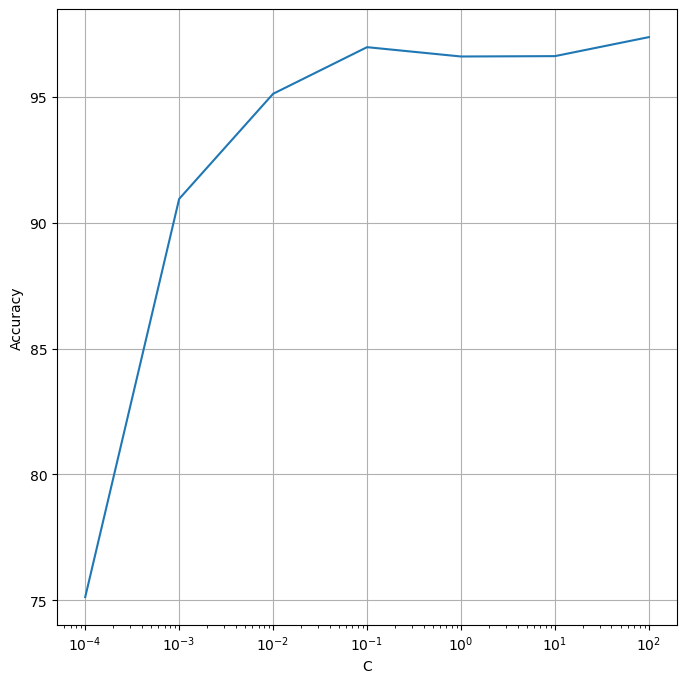

In [52]:
C_param(X_train, y_train, [.0001, .001, .01, .1, 1, 10, 100])

###### So we choose our L2 Regularization Constant, C, to be 0.1 to prevent overfitting for our model. We decided on 0.1 as we want our model to have room to be accurate so we should not pick a C of that of the peak. 0.1 is a good canadite as we have about 95% accuracy (and still we are regularizing the model to a significant amount, we choose the lowest number with high accuracy) so our model looks to be very good here. 

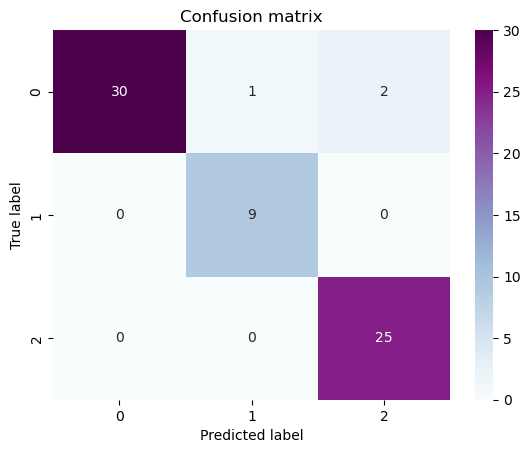

The Test Model Score 0.9552238805970149
0.9552238805970149


In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

logmod = LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs', C= .1, max_iter = 10000)#creating our logistic regression model
logmod.fit(X_train, y_train)

y_pred = logmod.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='BuPu')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("The Test Model Score " + str(logmod.score(X_test, y_test)))
print(accuracy_score(y_test, y_pred))

#### Confusion Matrix and Test Model Accuracy Score analysis
First see the confusion matrix of our model indicates that the model has 30 true positives (actual and predicted value the same) w/ 3 false negative (the actual value is positive, predicition negative). We also see zero false positive (the actual value is negative, prediction positive), and 34 true negatives (actual and predicted value the same). While the results slightly differ when re-running the code, there is usually an accuracy score of around 96%, which seems positive as, while we would like it to be higher, given the overlap in the variables considered as well as how they relate to each other between species, any higher may raise significant concerns about overfitting. The confusion matrix ususally showed a couple mistakes made in the predictions. For example, one time the model falsely classified a Gentoo and Chinstrap penguin as Adelie penguins as well as a Chinstrap penguin as an Gentoo penguin. These mistakes are probably attributable to some penguins being at the more extreme ends of the ranges of Culmen Lengths and Body Masses for their species and sex thereby falling in overlapping areas with other species. When a combination of these factors is true, our model may make false predictions. This may raise some concerns about it being used to classify penguins from different areas as their Culmen Lengths and Body Masses might fall further from the medians and means of their species, especially with Body Mass as it depends on diet and the types of food avaiable. Nonetheless, the model seems to classify penguins from this region correctly the vast majority of the time. 

/Users/davidreynoso/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/davidreynoso/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


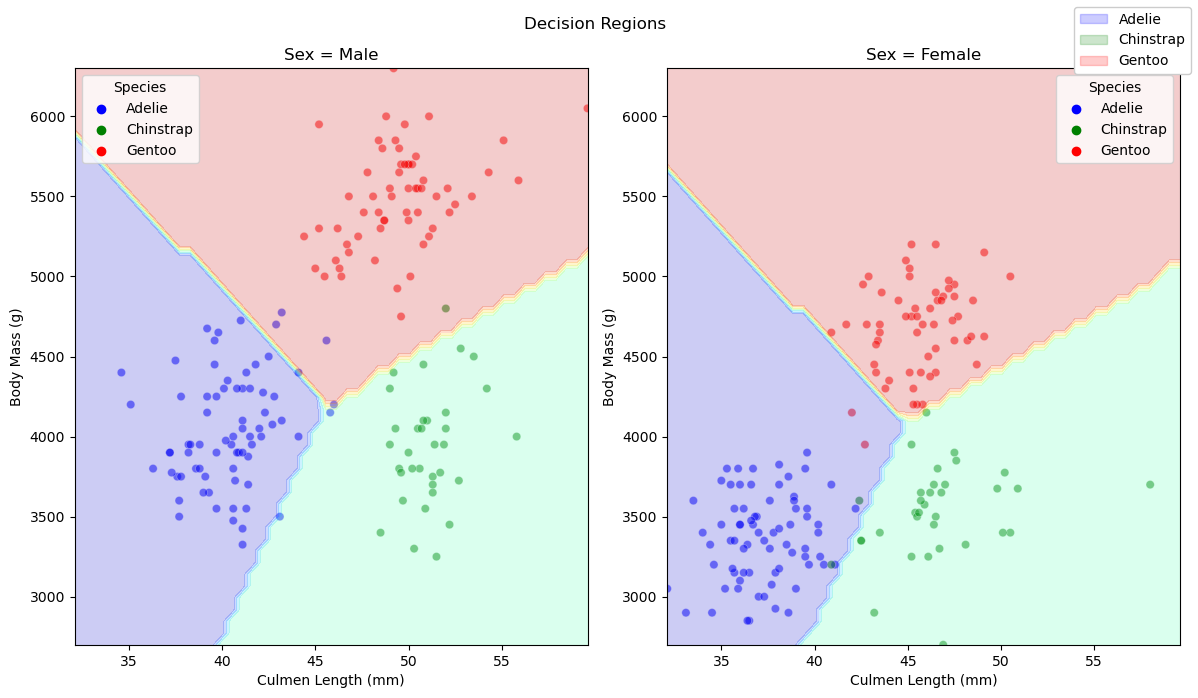

In [54]:
regions(logmod,X,y)

### Log Mod Decisions Regions Analysis
The plot above indicates that our model was accurate for the most part (96% of the time), however, the biggest trend we noticed when running it multiple times in terms of mistakes was some males Adelie penguins falling into the predicted Chinstrap decisions region and vice versa for females. We do end up seeing some overfitting, especially for our models indicators around the region boundaries, the penguins can be mistaken for the for the wrong species. Apart from a couple exceptions, Gentoo penguins were mostly correctly classified. These limitations are mostly explained by findings of overlap in body mass being Chinstrap and Adelie penguins of the same sex leaving Culmen Length to be the made distinguisher between the two species, however, there was some overlap even in culmen length and our pair plot indicated some overlap between culmen length by body mass as well. This comes down to needing to accept that classifying the species of a penguin based on 3 variables alone will not always be 100% accurate, as the predictions depend on a variety of random factors, including how many outlying scores where included in the test data vs the predictor data. 

# Neural Network

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
Neural_train = scaler.fit_transform(X_train)
Neural_test = scaler.transform(X_test)

In [57]:
layers = [2,3,4,5,6,7,8,9,10]
best_score=0
best_layer=0
scoreMat=[]
for i in layers:
    clf = MLPClassifier(hidden_layer_sizes=(i,5), max_iter=2000, alpha=0.0001,
                    solver='sgd', verbose=0,  random_state=7, learning_rate_init=0.001)
    clf.fit(Neural_train, y_train)
    score = cross_val_score(rf, Neural_train, y_train, cv=5).mean()
    scoreMat.append(score)
    if score>best_score:
        best_layer = i
        best_score = score
    print("Test accuracy: "+str(score)+" for a Neural Network of Depth- "+str(i))


Test accuracy: 0.9587002096436059 for a Neural Network of Depth- 2
Test accuracy: 0.9510831586303283 for a Neural Network of Depth- 3
Test accuracy: 0.9587002096436059 for a Neural Network of Depth- 4
Test accuracy: 0.9622641509433961 for a Neural Network of Depth- 5
Test accuracy: 0.9624039133473097 for a Neural Network of Depth- 6
Test accuracy: 0.9510132774283718 for a Neural Network of Depth- 7
Test accuracy: 0.962334032145353 for a Neural Network of Depth- 8
Test accuracy: 0.943466107617051 for a Neural Network of Depth- 9
Test accuracy: 0.9548567435359887 for a Neural Network of Depth- 10


In [58]:
# Combine the two lists into a list of tuples
d = list(zip(layers, scoreMat))

# Create a pandas dataframe from the list of tuples
toPrint = pd.DataFrame(d, columns=['Layers', 'Score'])

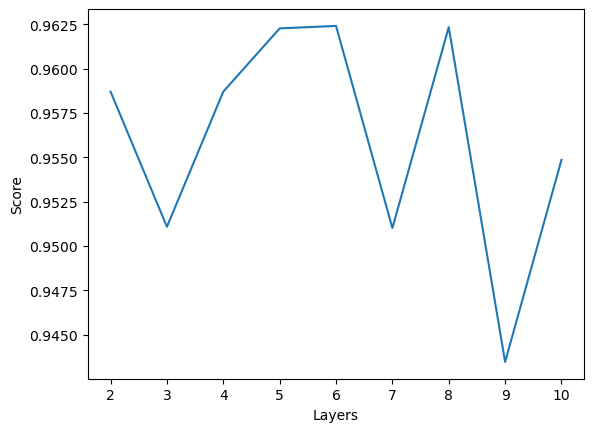

In [59]:
ax = sns.lineplot(x='Layers', y='Score',data=toPrint)

# Show the plot
plt.show()

#### Neural Network Layers vs Accuracy score line graph analysis
The graph above was performed in order for us to visualize the optimal level of complexity (numbe of layers) for our model in order maximize the accuracy score while simultaneously minimizing the level of complexity in order to minimize any possible overfitting. The graph above gives reason to believe that the optimal number of layers is 3 or 4 as that is the lowest level of complexity yielding the highest accuracy score. While when running the code multiple time we have had varying results for the graph, overall, either 3 or 4 layers is rather consistantly the peak in accuracy score using the least amount of complexity.

In [60]:
clf = MLPClassifier(hidden_layer_sizes=(3,5), max_iter=1000, alpha=1e-4,
                    solver='sgd', random_state=7,
                    learning_rate_init=.1)
clf.fit(Neural_train, y_train)
score = clf.score(Neural_test, y_test)
print("Test accuracy: "+str(score))

Test accuracy: 0.9850746268656716


#### Neural Network Acurracy Analysis
We recieved a test accuracy score of 100% when using 3 layers and 98% when using 4 layers so there is concern about overfitting, however, 2 layers are too few to yield a well fitted accuracy score, and any more than 4 would add a lot of noise distracting the model thereby increasing the likelyhood of overfitting so we chose to use 3 layers.

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

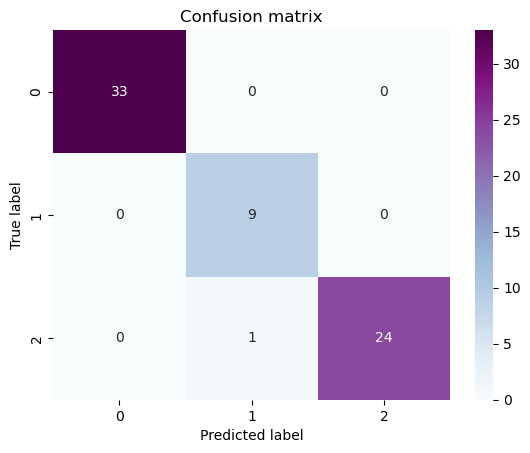

In [62]:
y_pred = clf.predict(Neural_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='BuPu')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Neural Network Confusion Matrix Analysis
First see the confusion matrix of our model indicates that the model has 33 true positives (actual and predicted value the same) w/zero false negative (the actual value is positive, predicition negative). We also see zero false positive (the actual value is negative, prediction positive), and 34 true negatives (actual and predicted value the same). The 100% accuracy score is reflected by the lack of any mistakes seen in the confusion matrix, even when running the model several times. While this does give great promise to this model in comparison to our previous models, the fact that we are only using 3 measurments all of which overlap to some extend between species in combination with this unusually perfect accuracy score makes us concerned about overfitting.

In [63]:
def Neural_regions(m, X, y):
    '''
    Fits the model to the predictor and target variables. Computes the accuracy score of the model.
    param:
    returns: nothing.
    '''
    sexes = X['Sex'].unique()
    fig, ax = plt.subplots(1, len(sexes), figsize=(11, 7))
    colors = {2:'Gentoo', 1:'Chinstrap', 0:'Adelie'}
    color_map = y.map(colors)
    culmen_range_f = np.linspace(X[X['Sex']==0]['Culmen Length (mm)'].min(), X[X['Sex']==0]['Culmen Length (mm)'].max())
    body_range_f = np.linspace(X[X['Sex']==0]['Body Mass (g)'].min(), X[X['Sex']==0]['Body Mass (g)'].max())
    culmen_range_m = np.linspace(X[X['Sex']==1]['Culmen Length (mm)'].min(), X[X['Sex']==1]['Culmen Length (mm)'].max())
    body_range_m = np.linspace(X[X['Sex']==1]['Body Mass (g)'].min(), X[X['Sex']==1]['Body Mass (g)'].max())


    # Create a meshgrid using the culmen and body ranges
    g1f, g2f = np.meshgrid(culmen_range_f, body_range_f)
    g1m, g2m = np.meshgrid(culmen_range_m, body_range_m)
    for i, sex in enumerate(sexes):
        X_sex = X[X['Sex'] == sex]
        print(sex)
        ax[i].set_xlabel('Culmen Length (mm)')
        RealSex="string"
        if sex == 1:
            RealSex="Male"
            Z=m.predict(scaler.fit_transform(np.c_[g1m.ravel(), g2m.ravel(), np.ones(g1m.ravel().shape) * 1.0 * sex]))
            Z = Z.reshape(g1m.shape)
        else: 
            RealSex="Female"
            Z = m.predict(scaler.fit_transform(np.c_[g1f.ravel(), g2f.ravel(), np.ones(g1f.ravel().shape) * 1.0 * sex]))
            Z = Z.reshape(g1f.shape)
        ax[i].set_title("Sex = " + RealSex)
        colours={'Adelie':'blue','Chinstrap':'green','Gentoo':'red'}
        sns.scatterplot(x='Culmen Length (mm)', y='Body Mass (g)', hue=color_map,palette=colours,
                       data=X_sex, ax=ax[i], alpha=0.5)
        #decision regions
        if sex==1:
            ax[i].contourf(g1m,g2m,Z,alpha=0.2,cmap='jet')
        else:
            ax[i].contourf(g1f,g2f,Z,alpha=0.2,cmap='jet')
       

     #   decision regions
    


    # Set only one y-axis label for all plots
    ax[0].set_ylabel('Body Mass (g)')

    # Create the legend
    legend0 = mpatches.Patch(color='blue', label='Adelie', alpha=0.2)
    legend1 = mpatches.Patch(color='green', label='Chinstrap', alpha=0.2)
    legend2 = mpatches.Patch(color='red', label='Gentoo', alpha=0.2)
    fig.legend(handles=[legend0, legend1, legend2], loc='upper right',
               fontsize='medium', framealpha=1)

    
    fig.suptitle('Decision Regions')

    fig.tight_layout()
    plt.show()

1
0


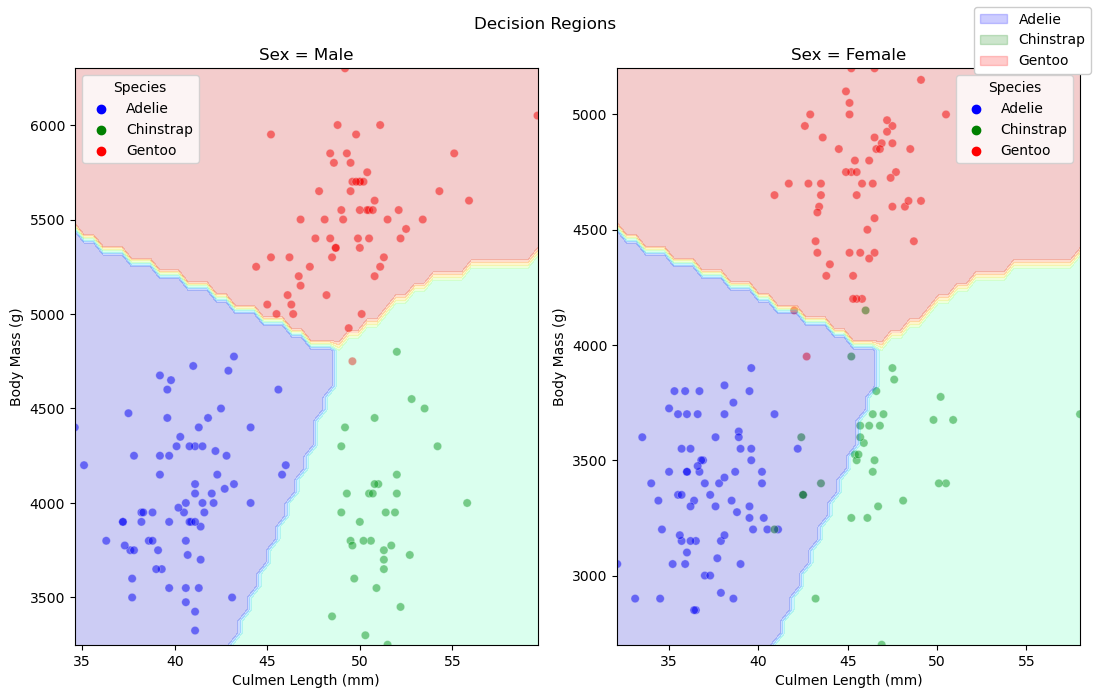

In [64]:
Neural_regions(clf, X, y)

#### Neural network decisions regions analysis
Overall, the predictions of this model were very accurate with a few exceptions, the most notible being Chinstrap females falling into the predicted Adelie species decisions regions. This is reflected in our exploratory analyisis that found that there was quite a bit of overlapp between Chinstrap and Adelie penguins, especially in Body Mass. A limitation in this model is therefore difficulty in distinguishing the species of penguins that lie on the border of the possiblities (the far side at either end of the ranges for their species) in Body Mass by Culmen Length, which stems from the limited amount of data available to us. The model appears to be more accurate in distinguishing males but the disparity between the accuracy score and the actual decisions regions for females does give concern about overfitting.

#### Conclusion and Limitations
All of our models have made mistakes in the decisions regions analysis, even when the supposed accuracy score was very high if not perfect. Moreover, we received different slightly different results when running them multiple times. The decisions regions scatterplots suggest that the Random Forest classifyer may be the best at classifying females while the Neural Netork model may be the most accurate at classifying males. The Neural Network model recieved the highest accuracy score but the decisions regions plot was not always accurate for females. However, the Log Mod model was the most consistent in terms of accuracy scores by layers. Overall, our suggestion is to utalize the Neural Network model as a first choice if the penguin is male and the Random forest classifyer if it is female. The Log Mod model would provide a good second opinion to validate the findings of the other model if that is possible.

It is important to note that all three models have limitations and will not always accurately predict the species of a penguin. This is inevidable given that we are only using 3 measures, one of which we just used in order to get a more accurate interpretation for the other variables and account for confounding factors resulting from that variable (Sex). Within penguins of the same sex, there is significant overlap between Adelie and Chinstrap penguins for body mass as well as between Gentoo and Chinstrap penguins for culmen length, as well as overlap between all three species for culmen length by body mass. Therefore, any of our models would more accurately predict the species of a penguin that falls closer within to the mean for its species or at the far end of the range that lies at the opposite end of the overlapping areas with other species. If the training data happens to include a lot of quote unquote "outlier" cases, then that will distort the predictions for the entire model and, if there are no or very few cases that lie within the far ends of the ranges for the measurements of the species in the training data, the model is likely to falsely classify a penguin whose measurements deviate from the mean for its species. In general, the limited sample size provided to us to conduct this investigation limit the accuracy of our model.

Another concern is overfitting, especially as more layers are used, which is seen primarily in the Neural Network model for females, which is another reason why we do not recommend this model as the first choice for classifying female penguins. 

Finally, while we lack reason to believe that any other measurements provided to us would yield better results, there are limitations based on the measurements themselves. For instance, body mass depends on diet and may differ by location, even within the same species, as well as natural conditions and season. Moreover, the study only included adult penguins so our models cannot be applied to children since their body masses and culmen lengths would differ. Finally, health is another confounding variable for body mass as sick penguins are more likely to have lower body masses.